In [2]:
import xarray as xr
from matplotlib import pyplot as plt
import matplotlib.cm as cm
import matplotlib.ticker as mticker
import cartopy.crs as ccrs
import cartopy.feature as cfeature
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER
import numpy.ma as ma
import numpy as np
import cmocean

%matplotlib inline

In [3]:
dsbathy=xr.open_dataset('/Users/auraoupa/Data/Bathy_entropie+gebco19around_finale.nc')
bathy=dsbathy['bathymetry']
navlon=dsbathy['lon']
navlat=dsbathy['lat']


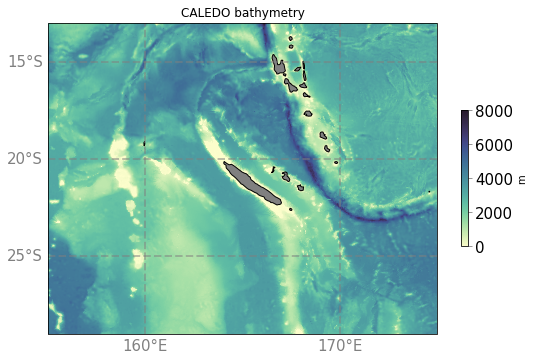

In [5]:
fig = plt.figure(figsize=(22,10))

ax = fig.add_subplot(121,projection=ccrs.PlateCarree(central_longitude=-30))
ax.autoscale(tight=True)
pcolor=ax.pcolormesh(navlon,navlat,-1*bathy,transform=ccrs.PlateCarree(),
                     cmap=cmocean.cm.deep,vmin=0,vmax=8000)

land_50m = cfeature.NaturalEarthFeature('physical', 'land', '50m',
                                        edgecolor='black',
                                        facecolor='grey')
ax.add_feature(land_50m)
gl=ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True,
                  linewidth=2, color='gray', alpha=0.5, linestyle='--')
gl.xlocator = mticker.FixedLocator(np.arange(-180,180,10))
gl.ylocator = mticker.FixedLocator(np.arange(-80,80,5))
gl.xformatter = LONGITUDE_FORMATTER
gl.yformatter = LATITUDE_FORMATTER
gl.xlabel_style = {'size': 15, 'color': 'gray'}
gl.ylabel_style = {'size': 15, 'color': 'gray'}
gl.ylabels_right = False
gl.xlabels_top = False
fig.subplots_adjust(right=0.8)

cbar = plt.colorbar(pcolor,orientation='vertical',shrink=0.25,label='m')
cbar.ax.tick_params(labelsize=15,color='gray')

plt.title('CALEDO bathymetry')
plt.savefig('bathy_CALEDO_GEBCO19.png', bbox_inches='tight')